In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import os
print(os.getcwd())

c:\Users\DELL\AppData\Local\Programs\Microsoft VS Code


In [4]:
# Paths to the datasets
train_data_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\Coding\\CodSoft_Internship\\Genre Classification Dataset\\train_data.txt"
test_data_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\Coding\\CodSoft_Internship\\Genre Classification Dataset\\test_data.txt"
test_data_solution_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\Coding\\CodSoft_Internship\\Genre Classification Dataset\\test_data_solution.txt"

In [5]:
# Read the datasets
train_data = pd.read_csv(train_data_path, delimiter=':::', header=None, engine='python')
test_data = pd.read_csv(test_data_path, delimiter=':::', header=None, engine='python')
test_data_solution = pd.read_csv(test_data_solution_path, delimiter=':::', header=None, engine='python')

In [6]:
# Display the first few rows of each dataset to verify
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

print("\nTest Data Solution:")
print(test_data_solution.head())

Train Data:
   0                                   1           2  \
0  1       Oscar et la dame rose (2009)       drama    
1  2                       Cupid (1997)    thriller    
2  3   Young, Wild and Wonderful (1980)       adult    
3  4              The Secret Sin (1915)       drama    
4  5             The Unrecovered (2007)       drama    

                                                   3  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  

Test Data:
   0                              1  \
0  1          Edgar's Lunch (1998)    
1  2      La guerra de papá (1977)    
2  3   Off the Beaten Track (2010)    
3  4        Meu Amigo Hindu (2015)    
4  5             Er nu zhai (1955)    

                                                   2  
0   L.R. Brane love

In [7]:
print("shape",train_data.shape)

shape (54214, 4)


In [8]:
print("shape",test_data_solution.shape)

shape (54200, 4)


In [9]:
# Concatenate train and test data
df = pd.concat([train_data, test_data_solution])

In [10]:
# Rename columns
df.columns = ["id", "Title", "Genre", "Description"]

In [11]:
# Display the first few rows
print(df.head())

   id                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [12]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id             0
Title          0
Genre          0
Description    0
dtype: int64


In [13]:
import string

In [14]:
# Lowercase text
df['Description'] = df['Description'].str.lower()

# Remove punctuation
df['Description'] = df['Description'].apply(lambda x: ''.join([c for c in x if c not in string.punctuation]))

# Tokenization (split text into words)
df['Description'] = df['Description'].apply(lambda x: x.split())

In [15]:
from nltk.corpus import stopwords
import nltk

In [16]:
nltk.download('stopwords')

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['Description'] = df['Description'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Description'] = df['Description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


In [18]:
# One-hot encoding for Genre (assuming it's a multi-class classification)
df = pd.get_dummies(df, columns=['Genre'])

In [19]:
from sklearn.model_selection import train_test_split

X = df['Description']
y = df.drop(['id', 'Title', 'Description'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
df.head()

,id,Title,Description,Genre_ action,Genre_ adult,Genre_ adventure,Genre_ animation,Genre_ biography,Genre_ comedy,Genre_ crime,...,Genre_ news,Genre_ reality-tv,Genre_ romance,Genre_ sci-fi,Genre_ short,Genre_ sport,Genre_ talk-show,Genre_ thriller,Genre_ war,Genre_ western
0,1,Oscar et la dame rose (2009),"[listening, conversation, doctor, parent, 10ye...",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Cupid (1997),"[brother, sister, past, incestuous, relationsh...",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,"Young, Wild and Wonderful (1980)","[bus, empty, student, field, trip, museum, nat...",False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,The Secret Sin (1915),"[help, unemployed, father, make, end, meet, ed...",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,The Unrecovered (2007),"[film, title, refers, unrecovered, body, groun...",False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


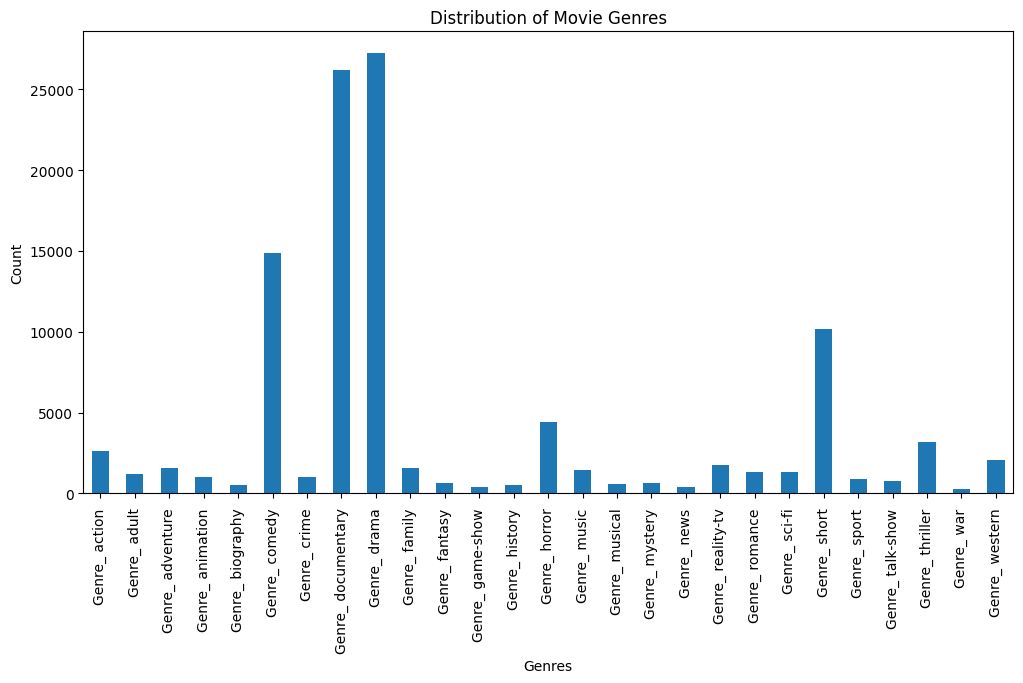

In [21]:
import matplotlib.pyplot as plt

# Extracting genre columns for analysis
genre_columns = df.columns[3:]  # Selecting columns related to movie genres

# Calculating genre counts for visualization
genre_counts = df[genre_columns].sum()

# Creating a bar chart to visualize the distribution of movie genres
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style
sns.set(style="whitegrid")


In [24]:
# Paths to the datasets
train_data_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\Coding\\CodSoft_Internship\\Genre Classification Dataset\\train_data.txt"
test_data_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\Coding\\CodSoft_Internship\\Genre Classification Dataset\\test_data.txt"
test_data_solution_path = "C:\\Users\\DELL\\OneDrive\\Desktop\\Coding\\CodSoft_Internship\\Genre Classification Dataset\\test_data_solution.txt"

# Read the datasets
train_data = pd.read_csv(train_data_path, delimiter=':::', header=None, engine='python')
test_data = pd.read_csv(test_data_path, delimiter=':::', header=None, engine='python')
test_data_solution = pd.read_csv(test_data_solution_path, delimiter=':::', header=None, engine='python')

# Rename columns
train_data.columns = ["ID", "Title", "Genre", "Description"]
test_data.columns = ["ID", "Title", "Description"]
test_data_solution.columns = ["ID", "Title", "Genre", "Description"]

# Display the first few rows of each dataset to verify
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

print("\nTest Data Solution:")
print(test_data_solution.head())

Train Data:
   ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  

Test Data:
   ID                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description  
0   L.R

C:\Users\DELL\AppData\Local\Temp\ipykernel_32128\1968259765.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


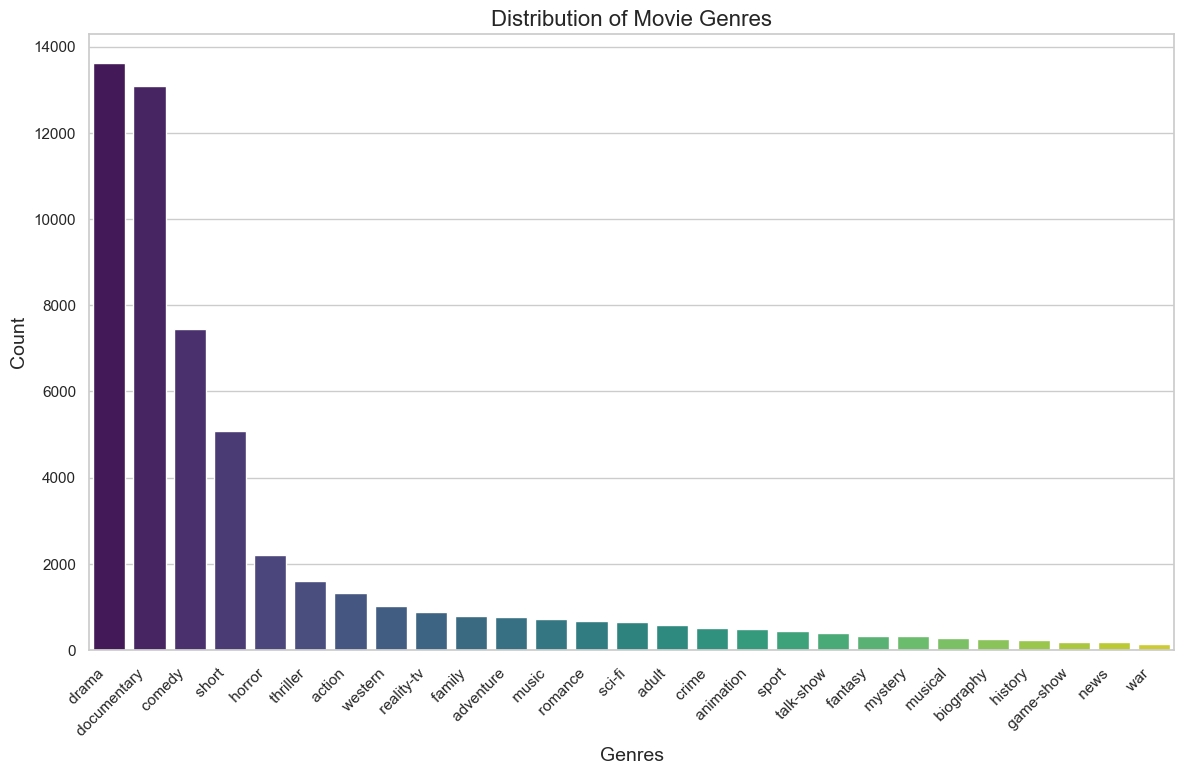

In [25]:
# Extracting genre columns for analysis
genre_columns = ["Genre"]  # Assuming 'Genre' is a single column and not split into multiple columns for different genres

# Calculating genre counts for visualization
genre_counts = train_data["Genre"].value_counts()

# Creating a bar chart to visualize the distribution of movie genres
plt.figure(figsize=(14, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
!pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 163.8 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 163.4 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 217.9 kB/s eta 0:00:02
   ---------- ---------------------------- 81.9/300.2 kB 269.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/300.2 kB 312.2 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 392.8 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 454.0 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/300.2 kB 519.9 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 579.8 kB/s eta 0


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


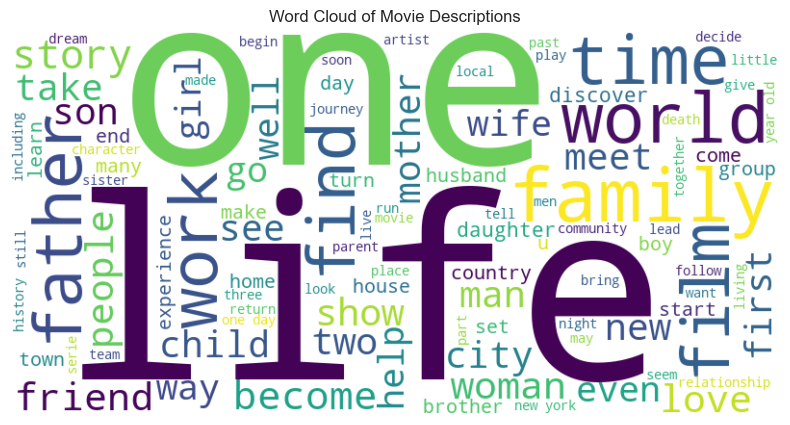

In [30]:
from wordcloud import WordCloud

# Combine all descriptions into a single text
all_descriptions = ' '.join([' '.join(desc) for desc in df['Description']])

# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_descriptions)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()

In [33]:
# Setting Seaborn style
sns.set(style="whitegrid")

# Rename columns
train_data.columns = ["ID", "Title", "Genre", "Description"]
test_data.columns = ["ID", "Title", "Description"]
test_data_solution.columns = ["ID", "Title", "Genre", "Description"]

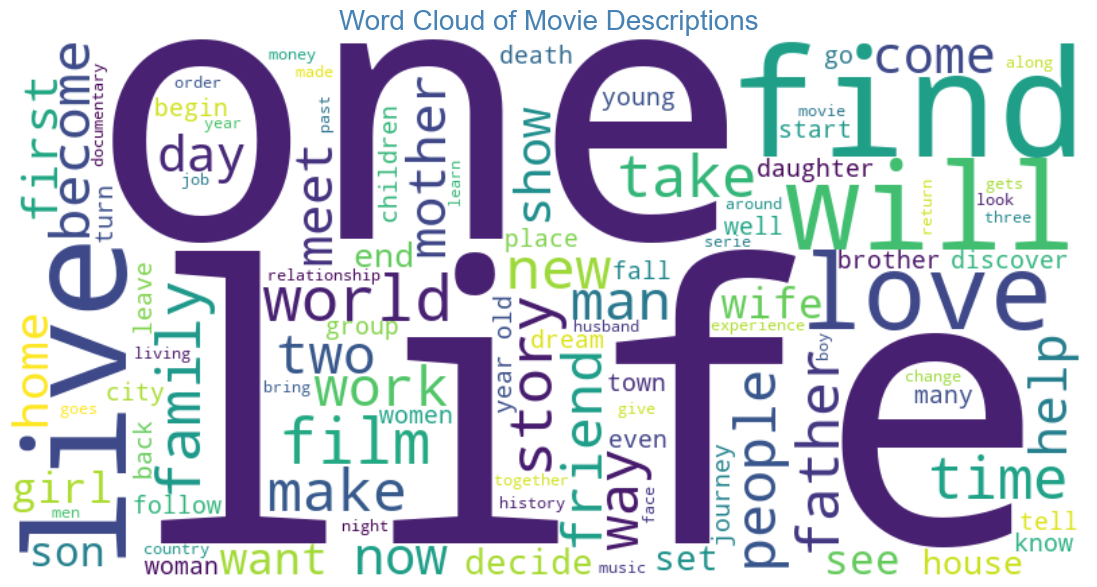

In [34]:
from wordcloud import WordCloud

# Combine all descriptions into a single text
all_descriptions = ' '.join(train_data['Description'])

# Generate and display a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    max_words=100,
    background_color='white',
    colormap='viridis',  # Change the color map
    contour_color='steelblue',
    contour_width=1,
    random_state=42  # Ensuring reproducibility
).generate(all_descriptions)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions', fontsize=20, color='steelblue')
plt.show()

In [35]:
# Create a new feature: Word Count
df['Word_Count'] = df['Description'].apply(lambda x: len(x))

# Create a new feature: Average Word Length
df['Avg_Word_Length'] = df['Description'].apply(lambda x: sum(len(word) for word in x) / len(x))

# Create binary features for the presence of keywords
keywords = ['action', 'adventure', 'comedy', 'drama', 'romance']  # Replace with relevant keywords
for keyword in keywords:
    df[f'Has_{keyword}_Keyword'] = df['Description'].apply(lambda x: keyword in x).astype(int)

# Display the updated DataFrame with new features
df.head()

,id,Title,Description,Genre_ action,Genre_ adult,Genre_ adventure,Genre_ animation,Genre_ biography,Genre_ comedy,Genre_ crime,...,Genre_ thriller,Genre_ war,Genre_ western,Word_Count,Avg_Word_Length,Has_action_Keyword,Has_adventure_Keyword,Has_comedy_Keyword,Has_drama_Keyword,Has_romance_Keyword
0,1,Oscar et la dame rose (2009),"[listening, conversation, doctor, parent, 10ye...",False,False,False,False,False,False,False,...,False,False,False,51,6.313725,0,0,0,0,0
1,2,Cupid (1997),"[brother, sister, past, incestuous, relationsh...",False,False,False,False,False,False,False,...,True,False,False,15,6.866667,0,0,0,0,0
2,3,"Young, Wild and Wonderful (1980)","[bus, empty, student, field, trip, museum, nat...",False,True,False,False,False,False,False,...,False,False,False,57,5.789474,0,0,0,0,0
3,4,The Secret Sin (1915),"[help, unemployed, father, make, end, meet, ed...",False,False,False,False,False,False,False,...,False,False,False,108,5.750000,0,0,0,0,0
4,5,The Unrecovered (2007),"[film, title, refers, unrecovered, body, groun...",False,False,False,False,False,False,False,...,False,False,False,57,6.403509,0,0,0,0,0


In [36]:
column_names = df.columns
print(column_names)

Index(['id', 'Title', 'Description', 'Genre_ action ', 'Genre_ adult ',
       'Genre_ adventure ', 'Genre_ animation ', 'Genre_ biography ',
       'Genre_ comedy ', 'Genre_ crime ', 'Genre_ documentary ',
       'Genre_ drama ', 'Genre_ family ', 'Genre_ fantasy ',
       'Genre_ game-show ', 'Genre_ history ', 'Genre_ horror ',
       'Genre_ music ', 'Genre_ musical ', 'Genre_ mystery ', 'Genre_ news ',
       'Genre_ reality-tv ', 'Genre_ romance ', 'Genre_ sci-fi ',
       'Genre_ short ', 'Genre_ sport ', 'Genre_ talk-show ',
       'Genre_ thriller ', 'Genre_ war ', 'Genre_ western ', 'Word_Count',
       'Avg_Word_Length', 'Has_action_Keyword', 'Has_adventure_Keyword',
       'Has_comedy_Keyword', 'Has_drama_Keyword', 'Has_romance_Keyword'],
      dtype='object')


In [37]:
# Importing necessary libraries for model selection and training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [38]:
# Selecting the features and labels
X = train_data['Description']
y = train_data['Genre']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [40]:
# Selecting the features and labels
X = train_data['Description']
y = train_data['Genre']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [42]:
# Use a smaller subset for initial training
subset_size = 5000  # Adjust based on available computational power
X_train_subset = X_train_tfidf[:subset_size]
y_train_subset = y_train[:subset_size]

# Initialize the classifiers
logreg = LogisticRegression(max_iter=1000, n_jobs=-1)
svm = LinearSVC()
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Train the classifiers on a smaller subset
logreg.fit(X_train_subset, y_train_subset)
svm.fit(X_train_subset, y_train_subset)
nb.fit(X_train_subset, y_train_subset)
rf.fit(X_train_subset, y_train_subset)

RandomForestClassifier(n_jobs=-1)

In [43]:
# Predicting the test set results
y_pred_logreg = logreg.predict(X_test_tfidf)
y_pred_svm = svm.predict(X_test_tfidf)
y_pred_nb = nb.predict(X_test_tfidf)
y_pred_rf = rf.predict(X_test_tfidf)

# Evaluate the models
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Linear SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Multinomial Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

Logistic Regression Classification Report:
                precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.54      0.34      0.41      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.90      0.67      2659
       drama        0.42      0.84      0.56      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.80      0.04      0.07       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

Linear SVM Classification Report:
                precision    recall  f1-score   support

      action        0.42      0.12      0.19       263
       adult        0.59      0.12      0.19       112
   adventure        0.44      0.09      0.14       139
   animation        1.00      0.01      0.02       104
   biography        0.00      0.00      0.00        61
      comedy        0.47      0.49      0.48      1443
       crime        0.00      0.00      0.00       107
 documentary        0.60      0.85      0.70      2659
       drama        0.49      0.73      0.58      2697
      family        0.58      0.05      0.09       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.93      0.33      0.48        40
     history        0.00      0.00      0.00        45
      horror        0.59      0.42      0.49       431
       music        0.59      0.20      0.30       144
     musical        0.00      0.00      0.00        50
     mystery        0.00     

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

Random Forest Classification Report:
                precision    recall  f1-score   support

      action        0.50      0.00      0.01       263
       adult        1.00      0.02      0.04       112
   adventure        0.50      0.01      0.03       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.55      0.21      0.30      1443
       crime        0.00      0.00      0.00       107
 documentary        0.54      0.87      0.67      2659
       drama        0.39      0.85      0.54      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.05      0.10        40
     history        0.00      0.00      0.00        45
      horror        0.58      0.03      0.05       431
       music        1.00      0.03      0.05       144
     musical        0.00      0.00      0.00        50
     mystery        0.00  

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


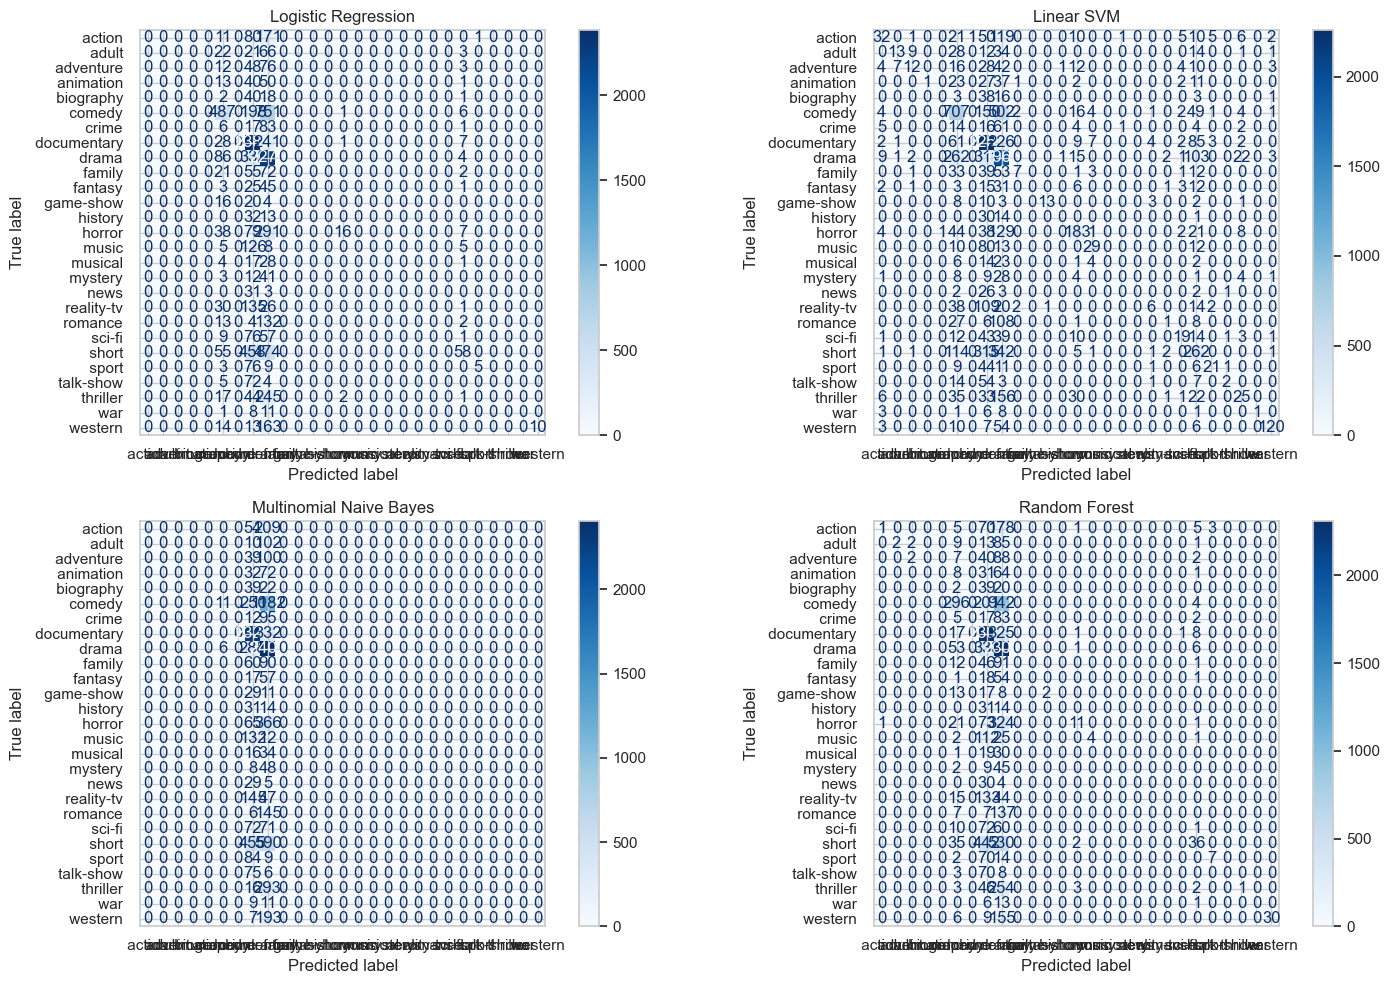

In [44]:
# Plot confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(logreg, X_test_tfidf, y_test, ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Logistic Regression')

# Linear SVM
ConfusionMatrixDisplay.from_estimator(svm, X_test_tfidf, y_test, ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('Linear SVM')

# Multinomial Naive Bayes
ConfusionMatrixDisplay.from_estimator(nb, X_test_tfidf, y_test, ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('Multinomial Naive Bayes')

# Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test_tfidf, y_test, ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('Random Forest')

plt.tight_layout()
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)
best_logreg = grid_search.best_estimator_

# Print best parameters
print("Best parameters for Logistic Regression:", grid_search.best_params_)

KeyboardInterrupt: 

In [46]:
# Train the best model on the full dataset
best_logreg.fit(X_train_tfidf, y_train)

# Predict and evaluate on the test set
y_pred_best_logreg = best_logreg.predict(X_test_tfidf)
print("Best Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_best_logreg))

NameError: name 'best_logreg' is not defined

In [ ]:
import joblib

# Save the trained model
joblib.dump(best_logreg, 'best_logistic_regression_model.pkl')

# Load the model later using
# best_logreg = joblib.load('best_logistic_regression_model.pkl')


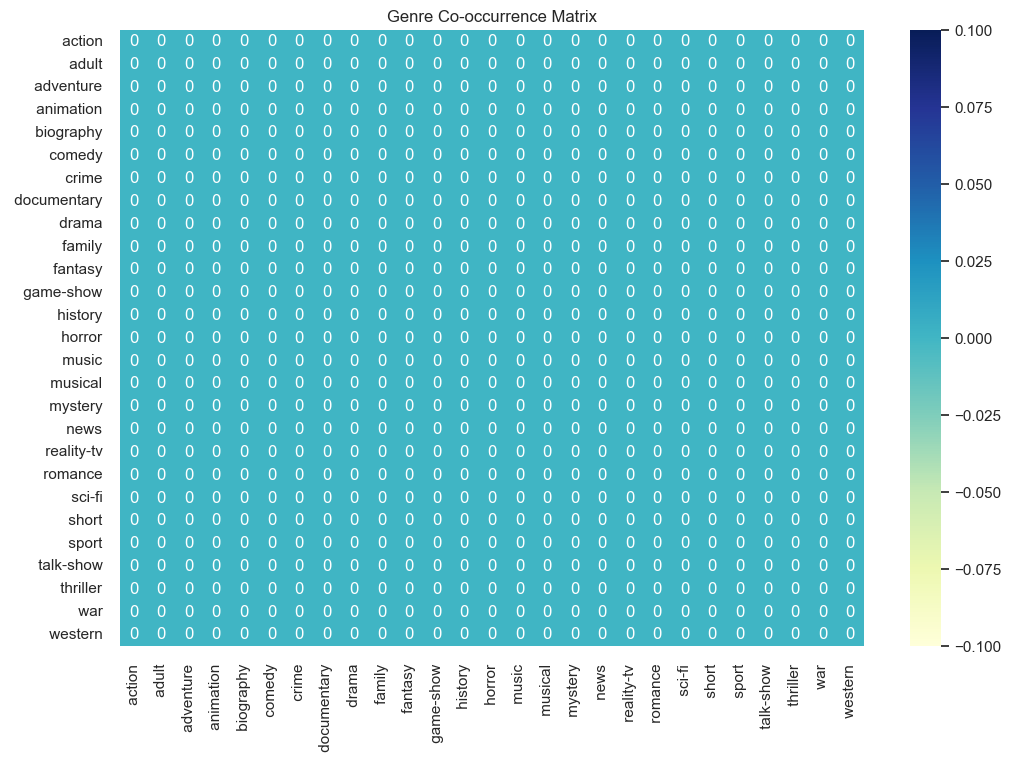

In [47]:
import seaborn as sns
import numpy as np

# Create a binary matrix for genre co-occurrence
genre_list = train_data['Genre'].str.get_dummies(sep=',')
genre_co_matrix = np.dot(genre_list.T, genre_list)
np.fill_diagonal(genre_co_matrix, 0)

# Create a DataFrame for the co-occurrence matrix
co_matrix_df = pd.DataFrame(genre_co_matrix, index=genre_list.columns, columns=genre_list.columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(co_matrix_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Genre Co-occurrence Matrix')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_32128\1534915042.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words_comedy.index, y=top_words_comedy.values, palette='viridis')


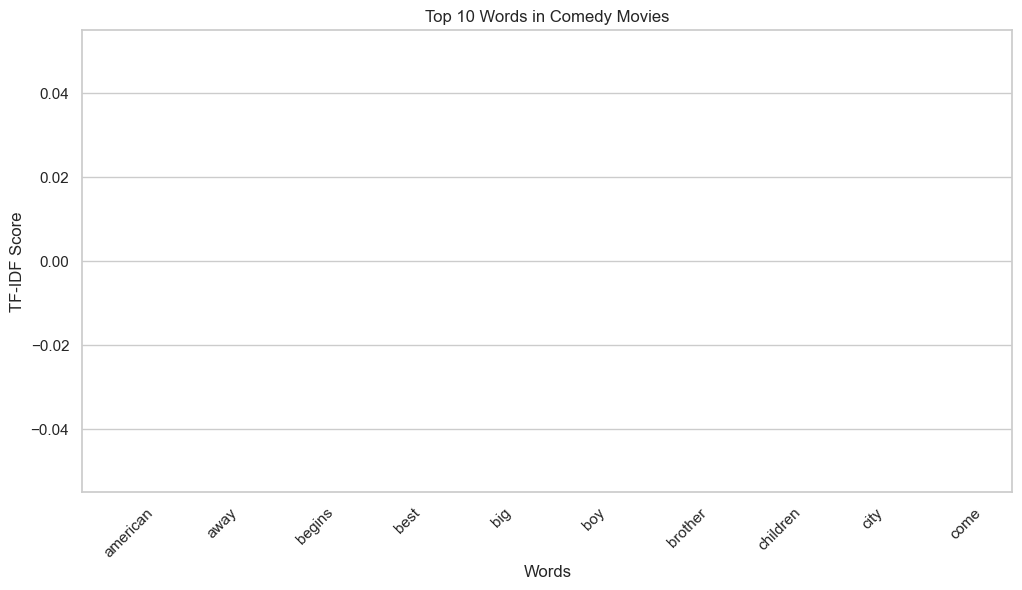

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the descriptions by genre
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['Description'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame for the TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df['Genre'] = train_data['Genre']

# Function to get top words per genre
def get_top_words_per_genre(genre, n=10):
    genre_subset = tfidf_df[tfidf_df['Genre'] == genre]
    top_words = genre_subset.drop(columns=['Genre']).mean().sort_values(ascending=False).head(n)
    return top_words

# Example: Plotting top words for a specific genre
specific_genre = 'Comedy'  # Change this to any genre of interest
top_words_comedy = get_top_words_per_genre(specific_genre)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_words_comedy.index, y=top_words_comedy.values, palette='viridis')
plt.title(f'Top 10 Words in {specific_genre} Movies')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()